In [41]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import math
import scipy
import scipy.stats
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt
from mpl_toolkits.mplot3d import Axes3D

In [42]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (13, 7)


## Exercise 8.01 ##
In this exercise we are required to use the Metropolis-Hastings algorithm to find the ground state of an hamiltonian in the form:
$$\hat{H}=-\frac{1}{2}\frac{\partial^2}{\partial x^2}+x^4-\frac{5}{2}x^2$$
Which is a one dimensional mexican hat potential. We will use the test function
$$ \Psi_{T}^{\sigma,\mu} =  e^{-(x-\mu)^2/2\sigma^2}+e^{-(x+\mu)^2/2\sigma^2}$$
and we will use $\sigma$ and $\mu$ as variational parameters to find the minimum value of $\langle \hat{H}\rangle$. We have:
$$-\frac{1}{2}\frac{\partial^2}{\partial x^2}\Psi=\left(\frac{1}{2\sigma^2}-\frac{(x-\mu)^2}{\sigma^2}\right)e^{-(x-\mu)^2/2\sigma^2}+\left(\frac{1}{2\sigma^2}-\frac{(x+\mu)^2}{\sigma^2}\right)e^{-(x+\mu)^2/2\sigma^2}$$

To do so we use the simulated annealing: we perform a random walk in the parameter space $(\mu,\sigma)$, with a probability density function given by:
$$p(\mu,\sigma)=\frac{e^{-\frac{H(\mu,\sigma)}{T}}}{Z}$$
And by decreasing the temperature slowly enough  we try to get into the state(i.e. the set of parameters) with the minimum value of $H(\mu,\sigma)$. 
To evaluate the integral we use the Monte Carlo integration already developed in the exercise 5(in principle we could use the system we prefer). 
To evaluate the integral we used 100 blocks, sampling 1000 positions for each step.
The simulated annealing has been performed by doing 100 step, with a temperature decaying with a power law:
$$T_i=T_0/i$$
Each step consisted in 100 steps in the parameter space. A step in the paramer space consists in a random increment for $\mu$ and $\sigma$ uniformly distributed in $[-0.05,0.05]$. We Started with $\mu=\sigma=1$, although different starting configurations are expoled in the next section.

In the next block we plot the value of $\langle H\rangle$ as a function of the number of number of annealing steps


Text(0.5, 0, 'Number of SA step')

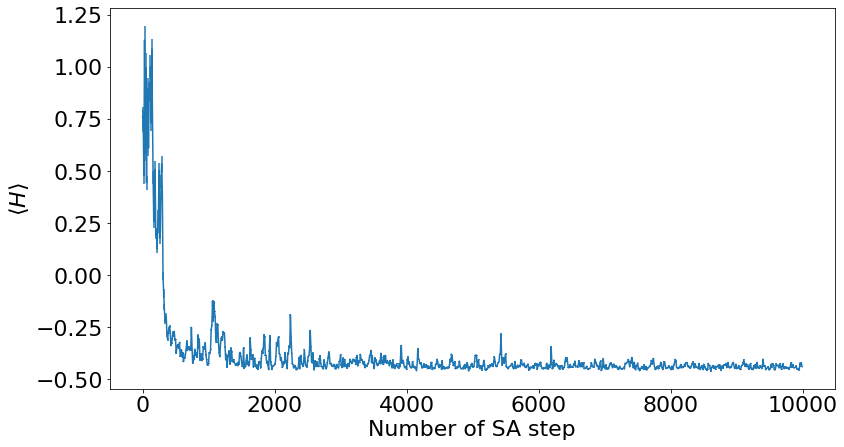

In [43]:
df=pd.read_csv(r'finalData\paramsPowerLaw.csv')
plt.errorbar(x=range(len(df.integral))[0::10],y=df.integral[0::10],yerr=df.error[0::10])
plt.title(r"")
plt.ylabel(r"$\langle H \rangle$")
plt.xlabel("Number of SA step")

We can see that our choice of the number of steps is really conservative, and luckily the initial conditions we chose aren't pathological. The last iteration brought us to the set of parameters:

In [44]:
index=df.integral
mu=float(df.tail(1).mu)
sigma=float(df.tail(1).sigma)
mu,sigma

(0.778549, 0.602241)

For which we obtained the integral:

Text(0, 0.5, 'Integral')

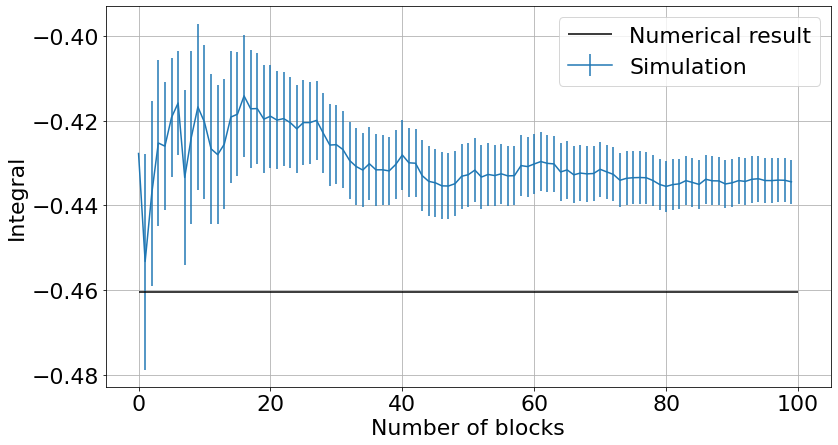

In [45]:
dfIntegral=pd.read_csv(r'finalData\integralsPowerLaw.csv')
plt.errorbar(x=range(len(dfIntegral.integral)),y=dfIntegral.integral, yerr=dfIntegral.error,label='Simulation')
plt.hlines(E[0],0,100,color='Black',label="Numerical result")
plt.legend()
plt.grid()
plt.xlabel("Number of blocks")
plt.ylabel("Integral")

can compare $\mu=0.77,\sigma=0.60$ with the exact numerical result

Ground state energy:  -0.46046587969271535
1st excited state energy:  0.09742471331761199
2nd excited state energy:  1.971733134393021


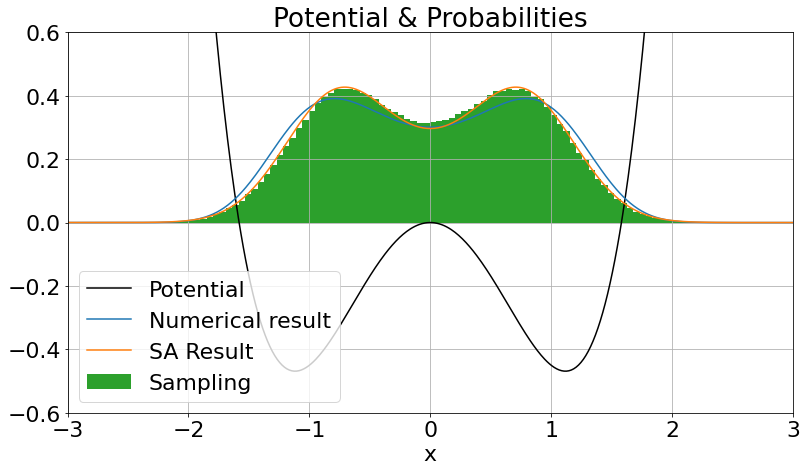

In [16]:
positions=pd.read_csv(r'finalData\positionsPowerLaw.csv')
def Vpot(x):
    return (x**2 - 2.5)*x**2
hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)
# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(13, 7))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2, label="Numerical result")
f=(np.exp((-(x-mu)**2)/(2*sigma**2))+np.exp((-(x+mu)**2)/(2*sigma**2)))**2
norm=np.trapz(f,x=x)
plt.plot(x,f/norm, label='SA Result')
plt.hist(positions.x,density=True, bins=100, label="Sampling")
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()

plt.show()

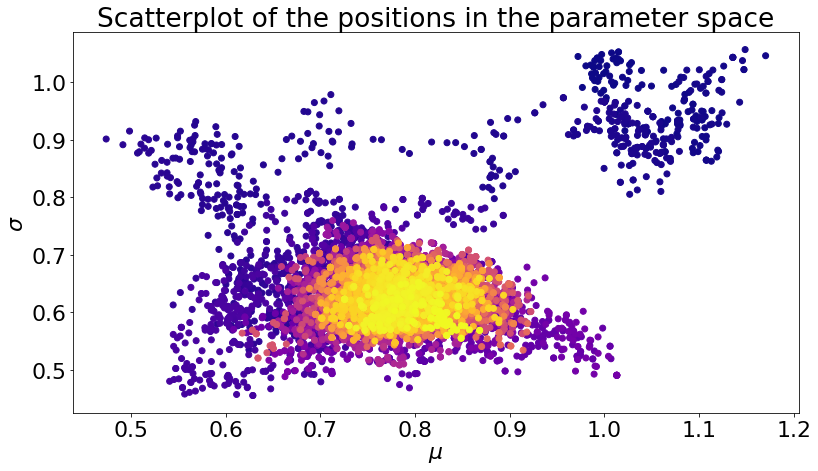

In [17]:
plt.scatter(df.mu, df.sigma, c=range(len(df.mu)), cmap='plasma')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')
plt.title('Scatterplot of the positions in the parameter space');

## The role of the initial conditions and the jump size ##
The tuning of the parameters has been the hardest part. For example, if we started with $\mu=1.41405$ and $1/2\sigma^2=218.33$ the program would not produce a reasonable answer.
If we debug the programs we can see these values while evaluating the hamiltonian to evaluate the integral:

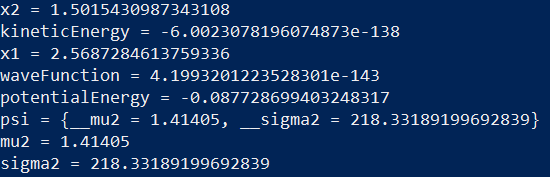

In the next step we are going to divide `kineticEnergy` by `waveFunction`, and dividing two subnormal number is going to gives us a precision problem. If we look at the previous lines we used `std::exp` on `x1*sigma2`, which is `-554`. The C++ references (https://en.cppreference.com/w/cpp/numeric/math/exp) for `std::exp` guarantees that we have an underflow for `arg<708`, and we can presume that at this point we already lost some precision.

We can in fact see what numpy would return us with the same lines of code and the same input values:

In [46]:
mu2=1.41405
sigma2=218.33
x=-0.18
psi2=np.exp(-(x-mu2)**2*sigma2)+np.exp(-(x+mu2)**2*sigma2**2)
x1=(x-mu2)**2;
x2=(x+mu2)**2;
waveFunction=np.sqrt(psi2);
potentialEnergy=x**4-5*(x**2)/2;
kineticEnergy=-sigma2*(-np.exp(-sigma2*x2) - np.exp(-sigma2*x1) + 2*sigma2*x1*np.exp(-sigma2*x1) + 2*sigma2*x2*np.exp(-sigma2*x2));
hamiltonian=(kineticEnergy/waveFunction)+potentialEnergy
display(f'x1: {x1:.3f}, x2: {x2:.3f},  waveFunction: {waveFunction:.3f} ,potentialEnergy,kineticEnergy: {kineticEnergy:.3f} ,hamiltonian: {hamiltonian:.5f}')

'x1: 2.541, x2: 1.523,  waveFunction: 0.000 ,potentialEnergy,kineticEnergy: -0.000 ,hamiltonian: -0.07995'

As we can see the results of numpy are more reasonable of the results of `std`. 

This isn't surprrising: we always start the metropolis sampling of the wavefunction from $x=0$, and if $\mu>>\sigma$ we have two sharp peaks, while in between the wavefunction may be smaller than floating poin precision. Doing arithmetic with very small numbers naturally introduce a big error, especially if we divide them.
A possible fix is ignoring the values of the wavefunction with a small probability, but that would require us to know the normalization, which we may not know in general.

## Annealing schedule ##
The annealing schedule is of crucial importance while annealing. This is exactly the same that happens in the natural phenomenon of annealing: a crystalline solid, which is the minimum energy configuration, is obtained only if the system is cooled down from the liquid phase slowly. When the cooling is too fast, the liquid may remain in a metastable phase: it's not the configuration with minimum energy, but the thrmal fluctuactions aren't strong enough to overcome the potentail barrier and bring the system to the real minimum of the energy.

For this reason we initially choose a slowly decaying function(a power law), nd we now want to explore what happens if we use different annealing schedules, described by $T(n)$, the temperature as a function of the number of annealing steps:
- $T=\frac{1}{N}$
- $T=\frac{1}{\sqrt{N}}$
- $T=10e^{-n}$

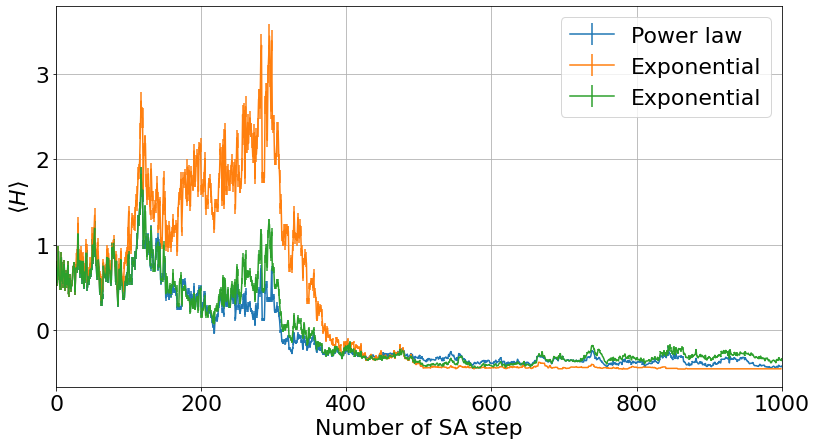

In [47]:
df=pd.read_csv(r'finalData\paramsPowerLaw.csv')
df2=pd.read_csv(r'finalData\paramsExponential.csv')
df3=pd.read_csv(r'finalData\paramsSqrt.csv')
plt.errorbar(x=range(len(df.integral)),y=df.integral,yerr=df.error, label="Power law")
plt.errorbar(x=range(len(df2.integral)),y=df2.integral,yerr=df2.error, label="Exponential")
plt.errorbar(x=range(len(df3.integral)),y=df3.integral,yerr=df3.error, label="Exponential")
plt.title(r"")
plt.ylabel(r"$\langle H \rangle$")
plt.xlabel("Number of SA step")
plt.legend()
plt.grid()
plt.xlim([0,len(df2.integral)]);

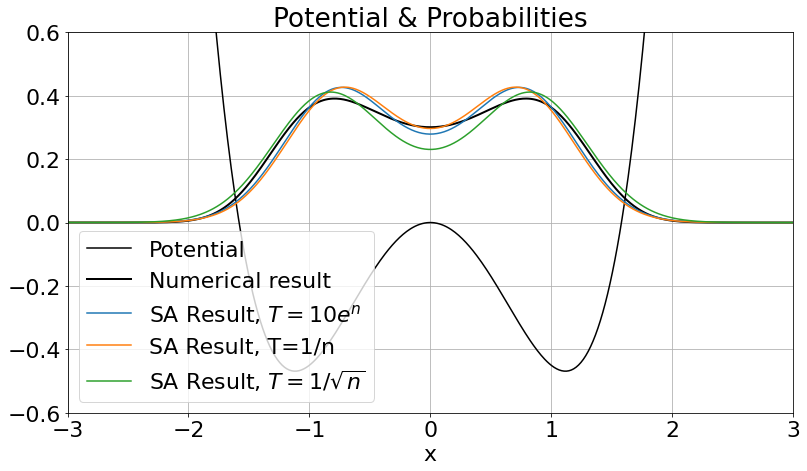

In [48]:
x = np.linspace(-a/2, a/2, N)
mu=float(df2.tail(1).mu)
sigma=float(df2.tail(1).sigma)
plt.figure(figsize=(13, 7))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2,color="Black", label="Numerical result", linewidth=2)
f=(np.exp((-(x-mu)**2)/(2*sigma**2))+np.exp((-(x+mu)**2)/(2*sigma**2)))**2
norm=np.trapz(f,x=x)
plt.plot(x,f/norm, label='SA Result, $T=10e^{n}$')

mu=float(df.tail(1).mu)
sigma=float(df.tail(1).sigma)
f=(np.exp((-(x-mu)**2)/(2*sigma**2))+np.exp((-(x+mu)**2)/(2*sigma**2)))**2
norm=np.trapz(f,x=x)
plt.plot(x,f/norm, label='SA Result, T=1/n')


mu=float(df3.tail(1).mu)
sigma=float(df3.tail(1).sigma)
scale = 0.3
f=(np.exp((-(x-mu)**2)/(2*sigma**2))+np.exp((-(x+mu)**2)/(2*sigma**2)))**2
norm=np.trapz(f,x=x)
plt.plot(x,f/norm, label=r'SA Result, $T=1/\sqrt{n}$')

plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()

plt.show()

As we can see there isn't an outstanding benefit in choosing a different annealing schedule for this problem

## Conclusions ##
It should be noted that, during this, we always considered the last set of parameters obtained, instead of considering the best set we obtaind in the entire time series. We did so to emphasize what we think is a very interesting result: all we did is a random walk in a specific potential with a variable temperature, and it naturally brought us to a reasonable solutions. 

This method is pretty raw, and the possible improvements are countless: we could change how we calculate the integral, we could make the step size adaptive, we could restart from a previous position when we get stuck in a local minimum, and we could event implement parallel tempering by using parallel computing.

It should always kept in mind, however, is the sensitivity to the initial conditions and the instability against floating point errors: we are dealing with exponential, and in particular we are dealing with division of exponential, and the error in rounding up division between very small number can have catastrophical result.